Reading data:

In [1]:
import pandas as pd

# path to the csv file
file_path = 'training_and_validation_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)



Printing all features' names: (24 features total)

In [2]:
# Print the column names
for i, col_name in enumerate(df.columns):
    print(f"Column {i}: {col_name}")

Column 0: Number of analysed fibres
Column 1: Fibre content, millions/g of pulp
Column 2: Fiber_Length_Below_556
Column 3: Fiber_Length_Above_556
Column 4: [1000->]
Column 5: Mean fibre arithmetic length, µm
Column 6: Mean length-weighted fibre length, µm
Column 7: Fiber_width_Below_19
Column 8: Fiber_width_Above_19
Column 9: Mean fibre width, µm
Column 10: Mean fibre coarseness, mg/m
Column 11: Average kink number
Column 12: Average kink angle, °
Column 13: Kinked fibre content, %
Column 14: Mean fibre curl index, %
Column 15: MacroFibrillation index, %
Column 16: Broken fibre content, %
Column 17: Number of analysed fines
Column 18: Fines content, millions/g of pulp
Column 19: Fine content, % in area
Column 20: Fine content, % in length
Column 21: Fine content, % in length weighted in length
Column 22: Mean fine area, µm²
Column 23: Mean fine length, µm


Normalizing all data values based on Min/Max feature scaling: 



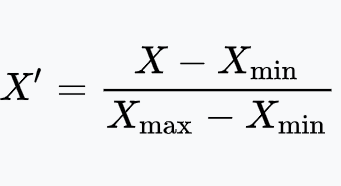

In [3]:
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)


Tuning alpha based on the minimum RMSE observed in the training and validation datasets:

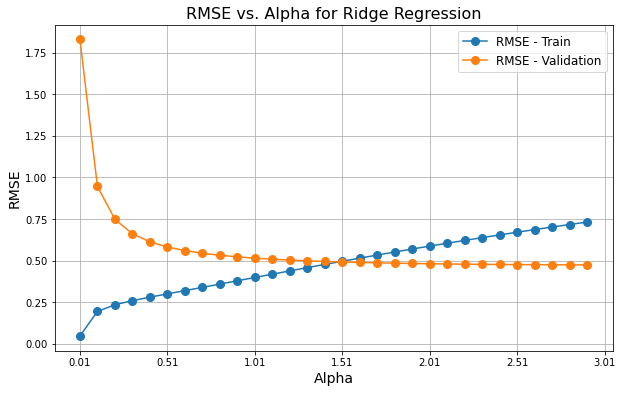

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd


# Defining the input variables as a dataframe df and y the output variable (Toughness)
y = np.array([2.043, 4.672, 6.676, 6.97, 7.923, 5.768, 4.364]) 
X_df = df

# Specify the indices of the training and validation data (random)
train_indices = [0, 2, 3, 4, 6]
validation_indices = [1, 5]

# Select the rows for training and validation 
X_train = X_df.iloc[train_indices]
X_validation = X_df.iloc[validation_indices]
y_train = y[train_indices]
y_validation = y[validation_indices]

# Vary alpha from 0.01 (small value) to 3 with 0.1 increments
alphas = np.arange(0.01, 3, 0.1)
rmse_train = []
rmse_validation = []

for alpha in alphas:
    # Initialize and train the Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predict on train and validation set
    y_pred_train = ridge_model.predict(X_train)
    y_pred_validation = ridge_model.predict(X_validation)

    # Calculate RMSE
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_validation.append(np.sqrt(mean_squared_error(y_validation, y_pred_validation)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse_train, label='RMSE - Train', marker='o', markersize=8)
plt.plot(alphas, rmse_validation, label='RMSE - Validation', marker='o', markersize=8)
plt.title('RMSE vs. Alpha for Ridge Regression', fontsize=16)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(min(alphas), max(alphas)+0.1, 0.5))  # Setting x ticks to show all alphas
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Defining the input variables as a dataframe df and y the output variable (Toughness)
y = np.array([2.043, 4.672, 6.676, 6.97, 7.923, 5.768, 4.364])
X_df = df 


train_indices = [0, 2, 3, 4, 6] 
validation_indices = [1, 5]  

# Select the rows for training and validation 
X_train = X_df.iloc[train_indices]
X_validation = X_df.iloc[validation_indices]
y_train = y[train_indices]
y_validation = y[validation_indices]

# Initialize the Ridge Regression model (alpha = 1.5)
ridge_model = Ridge(alpha=1.5, random_state=42) 

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = ridge_model.predict(X_validation)
y_pred_train = ridge_model.predict(X_train)

# Calculate the performance metrics
r2 = r2_score(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate NRMSE
y_range = np.max(y) - np.min(y)
nrmse = rmse / y_range
nrmse_train = rmse_train / y_range

# Print performance metrics for training data
print(f'RMSE train: {rmse_train}')
print(f'NRMSE train: {nrmse_train}')  
print(f'R2 Score train: {r2_train}')

# Print performance metrics for validation data
print(f'RMSE validation: {rmse}')
print(f'NRMSE validation: {nrmse}')


RMSE train: 0.49430361423036145
NRMSE train: 0.0840652405153676
R2 Score train: 0.9459692520859075
RMSE validation: 0.49214112890629197
NRMSE validation: 0.08369747090243061


Import test data that was normalized based on the training and validation datasets:

In [8]:
import pandas as pd

# Path to the csv file
file_path_test = 'normalized_test_data.csv'

# Read the csv file
df_test = pd.read_csv(file_path_test)

In [9]:
ridge_model.predict(df_test)

array([4.09612673, 6.88507873])

Calculate the RMSE and NRMSE for test data:

In [10]:
import numpy as np

# True and predicted values test data for LRR model
true = np.array([4.1784, 7.2949])
prediction = np.array([4.09612673, 6.88507873])

# Calculate RMSE
rmse = np.sqrt(np.mean((true - prediction) ** 2))

# Calculate NRMSE (normalized by the range of each datasets)
range_true = np.max(true) - np.min(true)
nrmse = rmse / range_true

print(f"RMSE test: {rmse:.4f}")
print(f"NRMSE test: {nrmse:.4f}")


RMSE test: 0.2956
NRMSE test: 0.0948


Feature importance:

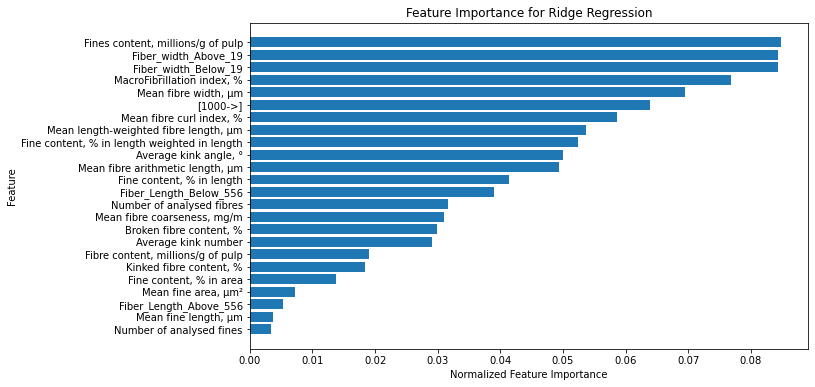

In [11]:
# Extract coefficients of features
feature_importance = np.abs(ridge_model.coef_)

# Normalize coefficients to sum up to 1
feature_importance /= np.sum(feature_importance)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X_train.columns[sorted_indices])
plt.xlabel('Normalized Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Ridge Regression')
plt.show()

Sensetivity analysis:

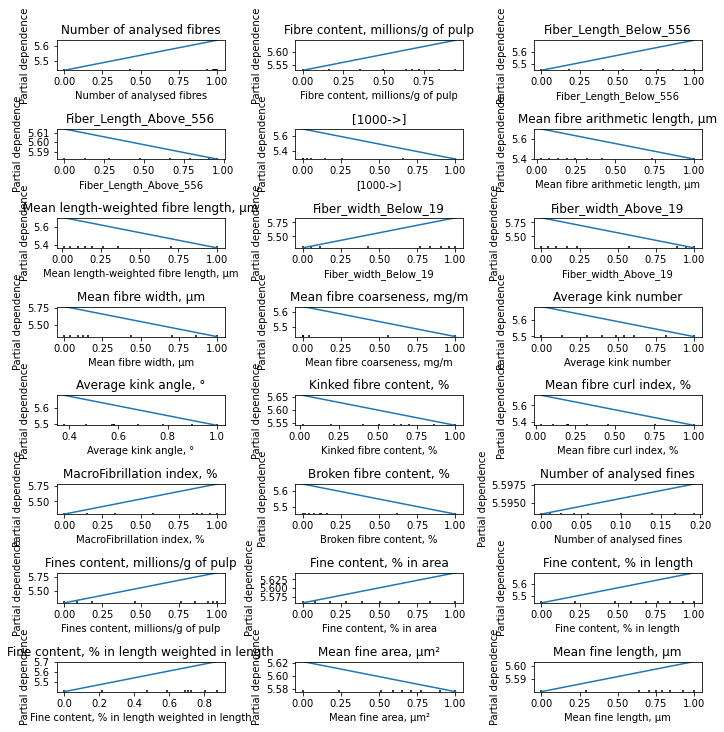

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt


# Plot Partial Dependence for all features
features = list(range(X_train.shape[1]))  # List of all feature indices
fig, axes = plt.subplots(nrows=(len(features) + 2) // 3, ncols=3, figsize=(10, 10))  
axes = axes.flatten()  

for i, feature in enumerate(features):
    if i < len(axes):
        plot_partial_dependence(ridge_model, X_train, [feature], ax=axes[i], grid_resolution=20, feature_names=X_train.columns)
        axes[i].set_title(X_train.columns[feature])

fig.tight_layout()
plt.show()


Final equation for LRR model

In [13]:
# Extracting the coefficients and intercept
intercept = ridge_model.intercept_
coefficients = ridge_model.coef_


print("The ridge model: Y = {:.2f}".format(intercept), end='')
for i, coef in enumerate(coefficients):
    print(" + {:.2f}*X{}".format(coef, i), end='')

The ridge model: Y = 5.29 + 0.20*X0 + 0.12*X1 + 0.25*X2 + -0.03*X3 + -0.41*X4 + -0.31*X5 + -0.34*X6 + 0.54*X7 + -0.54*X8 + -0.44*X9 + -0.20*X10 + -0.18*X11 + -0.32*X12 + -0.12*X13 + -0.37*X14 + 0.49*X15 + -0.19*X16 + 0.02*X17 + 0.54*X18 + 0.09*X19 + 0.26*X20 + 0.33*X21 + -0.05*X22 + 0.02*X23